# Predire si la reclamation appartien à la categorie 0 ou 1
categorie 0 = le process peut etre acceleré
categorie 1 = le process a besoin d'info additionelle pour etre accelleré

(114321, 133)
number of numerical features = 112
number of categorical features = 19
target
0    27300
1    87021
dtype: int64
percentage of null values:
0.3403748424734932
target
0    0.326751
1    0.344649
dtype: float64
0.908396946565
0.844682954138
(114321, 133)
(66489, 133)


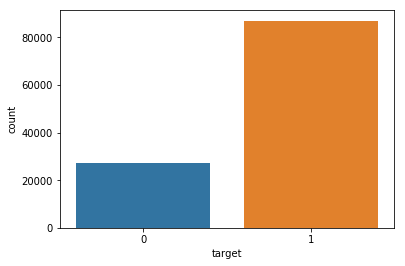

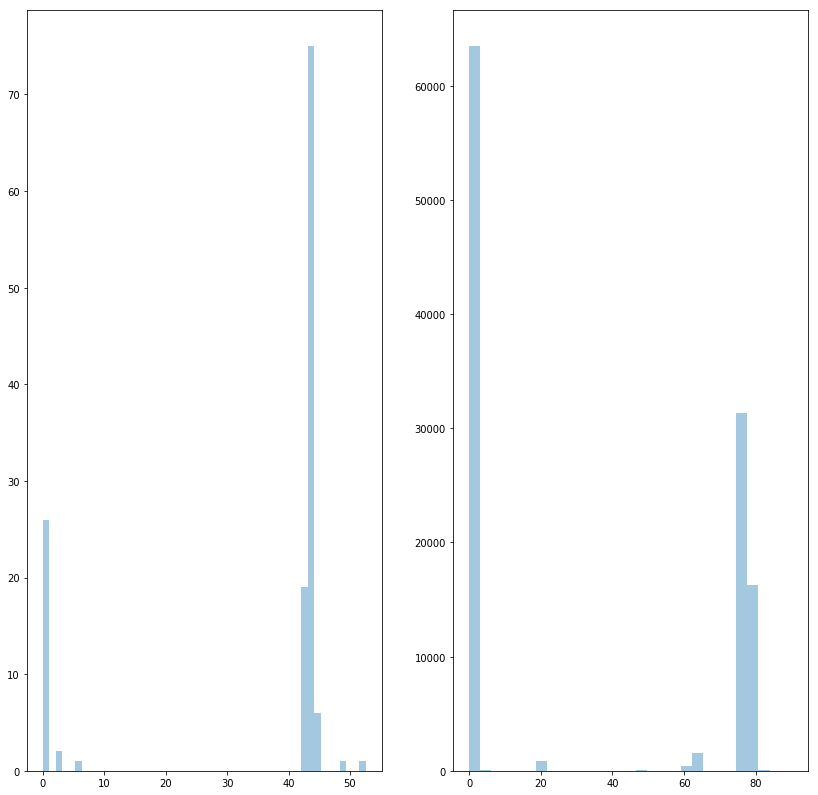

In [115]:
############
# Packages #
############

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
%matplotlib inline
##################
# Data analysis #
##################

# import data

data_o = pd.read_csv('train.csv')

# print dataset informations

print(data_o.shape)
data_o_num = data_o.select_dtypes(exclude = ['object'])
data_o_cat = data_o.select_dtypes(include = ['object'])
print('number of numerical features = %d' % (data_o_num.shape[1] - 2))
print('number of categorical features = %d' % data_o_cat.shape[1])

# are the data balances ? 
fig, ax = plt.subplots()
ax = sns.countplot(x = 'target', data =  data_o)
groups = data_o.groupby('target')
print(groups.size())

# exploring not a number values: 
print('percentage of null values:')
print(data_o.isnull().sum().sum() / (data_o.shape[0]*(data_o.shape[1] - 2) ) )
print(groups.apply(lambda x: x.isnull().sum().sum() / (x.shape[0]*(x.shape[1] - 2))))

null_per_columns = data_o.drop(['ID','target'], axis = 1).isnull().sum() / data_o.shape[0] * 100
null_per_rows = data_o.drop(['ID','target'], axis = 1).isnull().sum(axis = 1) / (data_o.shape[1] -2) * 100
print( data_o.drop(['ID','target'], axis = 1).isnull().any(axis = 0).sum() / (data_o.shape[1] -2)  )
print( data_o.drop(['ID','target'], axis = 1).isnull().any(axis = 1).sum() /(data_o.shape[0]) )
fig1, ax1 = plt.subplots(1, 2, figsize = (14, 14))
ax1[0] = sns.distplot(null_per_columns, kde = False, ax = ax1[0])
ax1[1] = sns.distplot(null_per_rows, kde = False, ax = ax1[1])

# check for duplicate rows 

data_o = data_o.drop_duplicates()
print(data_o.shape)

data_o = data_o.dropna(thresh=50, axis=0)
print(data_o.shape)

# Data analysis remarks

-> excluding ID we have 131 attributs: 112 numerical and 19 categorical 
-> data are not balanced, can a sub-sampling be useful?

(64489, 60)
{'max_depth': 30, 'n_estimators': 200}
0.755690628295
0.999979324319


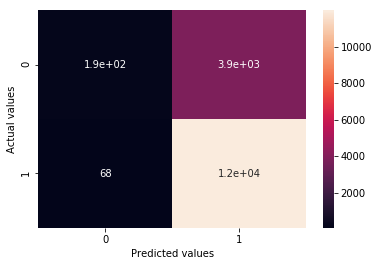

In [104]:
###################
# imputing values #
###################

data_o[data_o_num.columns] = data_o.select_dtypes(exclude = ['object']).fillna(data_o_num.mean())
data_o[data_o_cat.columns] = data_o.select_dtypes(include = ['object']).fillna(data_o_cat.mode().iloc[0])

data_X = data_o.drop(['target', 'ID'], axis = 1)
le = LabelEncoder()
for col_i in data_o_cat.columns:
    le.fit(data_X[col_i].values)
    data_X[col_i] = le.transform(data_X[col_i])

data_y = data_o['target']

from sklearn.decomposition import PCA

pca = PCA(n_components=60)
pca.fit(data_X)

data_X = pca.transform(data_X)

print(data_X.shape)
##############################
# create test and train sets #
##############################
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y)




#########
# model #
#########
et_model = ExtraTreesClassifier( n_jobs = -1)
grid_params = {
        'n_estimators' : [200],
        'max_depth' : [10, 20, 30]
    
}

et_CV = GridSearchCV(et_model, param_grid = grid_params, cv = StratifiedKFold(n_splits = 10, shuffle= True))

et_CV.fit(train_X,train_y)

predict_y = et_CV.predict(test_X)
predict_yt = et_CV.predict(train_X)
print(et_CV.best_params_)
print(accuracy_score(test_y, predict_y))
fig3, ax3 = plt.subplots()
conf_matrix = confusion_matrix(test_y, predict_y)
ax3 = sns.heatmap(conf_matrix, annot = True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
print(accuracy_score(train_y, predict_yt))

(66489, 6)
{'max_depth': 20, 'n_estimators': 200}
0.738254226072
0.977178839289


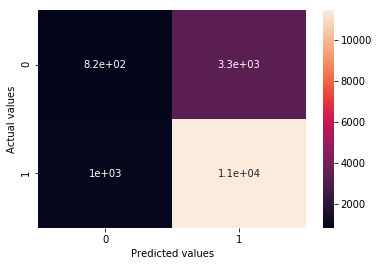

In [116]:
###################
# imputing values #
###################

data_o[data_o_num.columns] = data_o.select_dtypes(exclude = ['object']).fillna(data_o_num.mean())
data_o[data_o_cat.columns] = data_o.select_dtypes(include = ['object']).fillna(data_o_cat.mode().iloc[0])

data_X = data_o.drop(['target', 'ID'], axis = 1)
le = LabelEncoder()
for col_i in data_o_cat.columns:
    le.fit(data_X[col_i].values)
    data_X[col_i] = le.transform(data_X[col_i])

data_y = data_o['target']

from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pca.fit(data_X)

data_X = pca.transform(data_X)

print(data_X.shape)
##############################
# create test and train sets #
##############################
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y)




#########
# model #
#########
rf_model = RandomForestClassifier(class_weight = 'balanced', n_jobs = -1)
grid_params = {
        'n_estimators' : [200],
        'max_depth' : [10, 20]
    
}

rf_CV = GridSearchCV(rf_model, param_grid = grid_params, cv = StratifiedKFold(n_splits = 10, shuffle= True))

rf_CV.fit(train_X,train_y)

predict_y = rf_CV.predict(test_X)
predict_yt = rf_CV.predict(train_X)
print(rf_CV.best_params_)
print(accuracy_score(test_y, predict_y))
fig3, ax3 = plt.subplots()
conf_matrix = confusion_matrix(test_y, predict_y)
ax3 = sns.heatmap(conf_matrix, annot = True)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
print(accuracy_score(train_y, predict_yt))